In [6]:
import sys
import functools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
filename = "flickr30k-freq-train--no-bg-gt.csv"

df = pd.read_csv(filename)

In [8]:
df.head()

,class,pred,gt
0,__background__,8,0
1,goal,12,54
2,bathroom,7,24
3,macaroni,2,0
4,umpire,21,36


In [9]:
df.shape

(1135, 3)

# Functions

In [10]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100


def bar_plot(labels, values, label="Values", title="Chart"):
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()

    ax.bar(labels, values, width, label=label)

    ax.set_ylabel("Frequency")
    ax.set_title(title)
    ax.legend()

def pie_plot(labels, values, title="Chart"):
    fig, ax = plt.subplots()

    ax.pie(values, labels=labels, autopct='%1.1f%%')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    ax.set_title(title)


def stacked_plot(labels, preds, gts, title="Chart"):
    width = 0.35       # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots()

    ax.bar(labels, preds, width, label="# of predicted examples")
    ax.bar(labels, gts, width, bottom=preds, label="# of ground truth examples")

    ax.set_ylabel("Frequency")
    ax.set_title(title)
    ax.legend()

In [11]:
def take(df, start, end):
    return df[start:end]

take10 = functools.partial(take, start=0, end=10)
take15 = functools.partial(take, start=0, end=15)
take20 = functools.partial(take, start=0, end=20)
takenext20 = functools.partial(take, start=10, end=20)

# Preprocessing

In [12]:
# mi dice quanto sbaglio rispetto alla ground truth
df["diff"] = (df["pred"] - df["gt"]).abs()

# mi dice in percentuale (attualmente tra 0-1) quanto sbaglio rispetto alla ground truth
# se è 0 = non c'è errore
# se è 1 = errore max
df["diff_percent"] = (df["pred"] - df["gt"]).abs() / (df["pred"] + df["gt"])

# mi dice quanto sbaglio rispetto alla ground truth tenendo conto del perché 
# (troppe prediction oppure troppo poche)
df["diff_rel"] = df["pred"] - df["gt"]

# numero totale di predizioni per una classe
df["total"] = df["pred"] + df["gt"]

In [13]:
df.head()

,class,pred,gt,diff,diff_percent,diff_rel,total
0,__background__,8,0,8,1.000000,8,8
1,goal,12,54,42,0.636364,-42,66
2,bathroom,7,24,17,0.548387,-17,31
3,macaroni,2,0,2,1.000000,2,2
4,umpire,21,36,15,0.263158,-15,57


In [14]:
print("diff totali =", df.sort_values(by="diff", ascending=False)["diff"].sum())
print("diff top-10 =", df.sort_values(by="diff", ascending=False)["diff"][:10].sum())
print("diff __background__ =", df.sort_values(by="diff", ascending=False)["diff"][0].sum())

print("# pred =", df["pred"].sum())
print("# gt =", df["pred"].sum())
print("match (%) =", (df["pred"].sum() - df["diff"].sum()) / df["gt"].sum())

diff totali = 258958
diff top-10 = 130327
diff __background__ = 8
# pred = 427226
# gt = 427226
match (%) = 0.3938617968007565


# Analysis

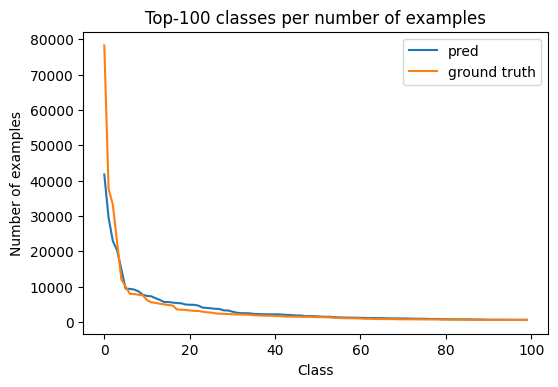

In [15]:
dfx = df.copy()
dfx = dfx.sort_values(by="gt", ascending=False)

labels = list(range(dfx["class"].shape[0]))
preds = dfx.sort_values(by="pred", ascending=False)["pred"]
gts = dfx.sort_values(by="gt", ascending=False)["gt"]
values = [preds, gts]

fig = plt.figure(figsize=(6, 4))
ax1 = fig.subplots(1, 1)

ax1.plot(labels[:100], preds[:100], label="pred")
ax1.plot(labels[:100], gts[:100], label="ground truth")
ax1.set_title("Top-100 classes per number of examples")
ax1.set_xlabel("Class")
ax1.set_ylabel("Number of examples")
ax1.legend()

plt.show()

# fig, ax = plt.subplots()
# ax.stackplot(labels, values, labels=["pred", "gt"])
# ax.set_yscale("log")
# ax2.legend()
# # ax.set_title('World population')
# # ax.set_xlabel('Year')
# # ax.set_ylabel('Number of people (millions)')

# plt.show()

## Top-10 most predicted classes on ground truth boxes

In [16]:
dfx = df.copy()
dfx.sort_values(by="pred", ascending=False).head(10)[["class", "pred"]]

,class,pred
40,man,41710
41,shirt,29515
75,woman,22893
101,hair,20271
162,head,14896
210,wall,9376
443,people,9330
308,hand,9143
197,hat,8654
153,jacket,7659


## Top-10 most predicted classes on ground truth boxes

In [17]:
dfx = df.copy()
dfx.sort_values(by="gt", ascending=False).head(10)[["class", "gt"]]

,class,gt
40,man,78250
75,woman,37751
443,people,33149
41,shirt,22585
190,boy,12019
99,dog,9989
210,wall,7905
117,girl,7886
155,water,7674
383,ground,7547


## Frequency of classes sorted by absolute gap between prediction and ground truth

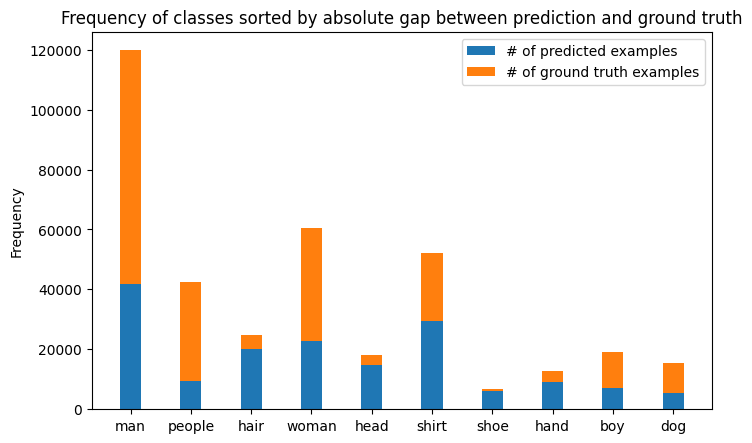

,class,pred,gt,diff,diff_rel,diff_percent
40,man,41710,78250,36540,-36540,0.304602
443,people,9330,33149,23819,-23819,0.560724
101,hair,20271,4628,15643,15643,0.628258
75,woman,22893,37751,14858,-14858,0.245004
162,head,14896,3110,11786,11786,0.654560
41,shirt,29515,22585,6930,6930,0.133013
205,shoe,6214,533,5681,5681,0.842004
308,hand,9143,3533,5610,5610,0.442569
190,boy,7232,12019,4787,-4787,0.248662
99,dog,5316,9989,4673,-4673,0.305325


In [18]:
dfx = df.copy()
dfx = dfx.sort_values(by=["diff"], ascending=False)

labels = take10(dfx["class"])
preds = take10(dfx["pred"])
gts = take10(dfx["gt"])

stacked_plot(labels, preds, gts, title="Frequency of classes sorted by absolute gap between prediction and ground truth")
plt.show()

dfx.head(n=10)[["class", "pred", "gt", "diff", "diff_rel", "diff_percent"]]

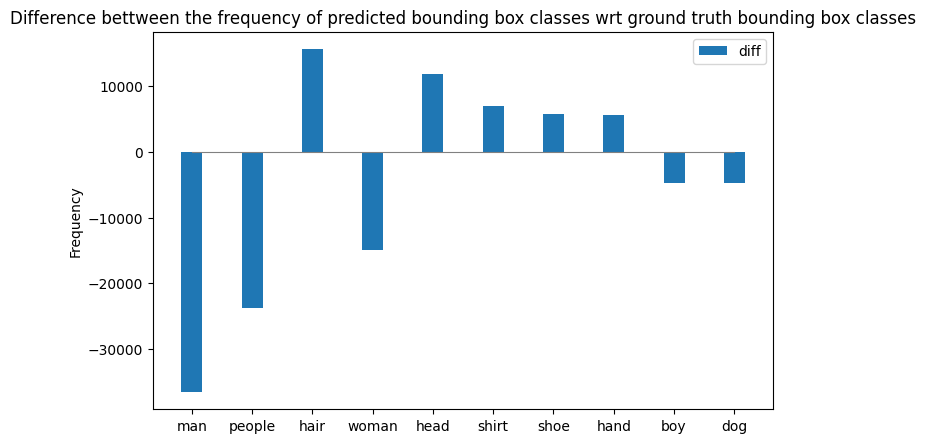

In [19]:
dfx = df.copy()
dfx = dfx.sort_values(by=["diff"], ascending=False)

labels = take10(dfx["class"])
diff_rel = take10(dfx["diff_rel"])

bar_plot(labels, diff_rel, label="diff", title="Difference bettween the frequency of predicted bounding box classes wrt ground truth bounding box classes")
plt.plot([0] * 10, "grey", linewidth=0.8)
plt.show()

## Frequency of classes sorted total number of prediction

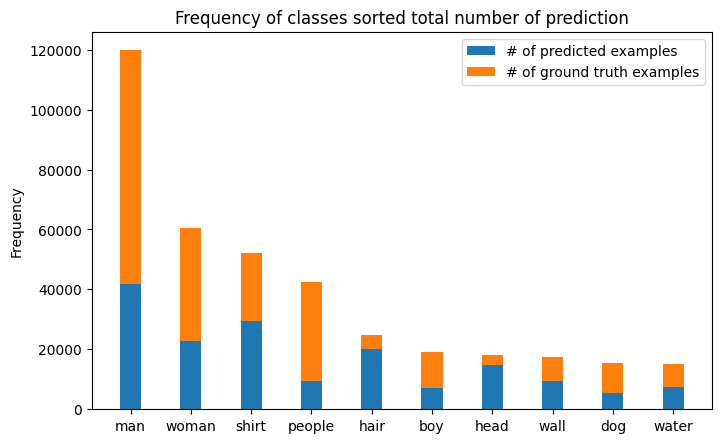

In [20]:
dfx = df.copy()
dfx = dfx.sort_values(by=["total"], ascending=False)

labels = take10(dfx["class"])
preds = take10(dfx["pred"])
gts = take10(dfx["gt"])

stacked_plot(labels, preds, gts, title="Frequency of classes sorted total number of prediction")
plt.show()

## Frequency of classes sorted by diff

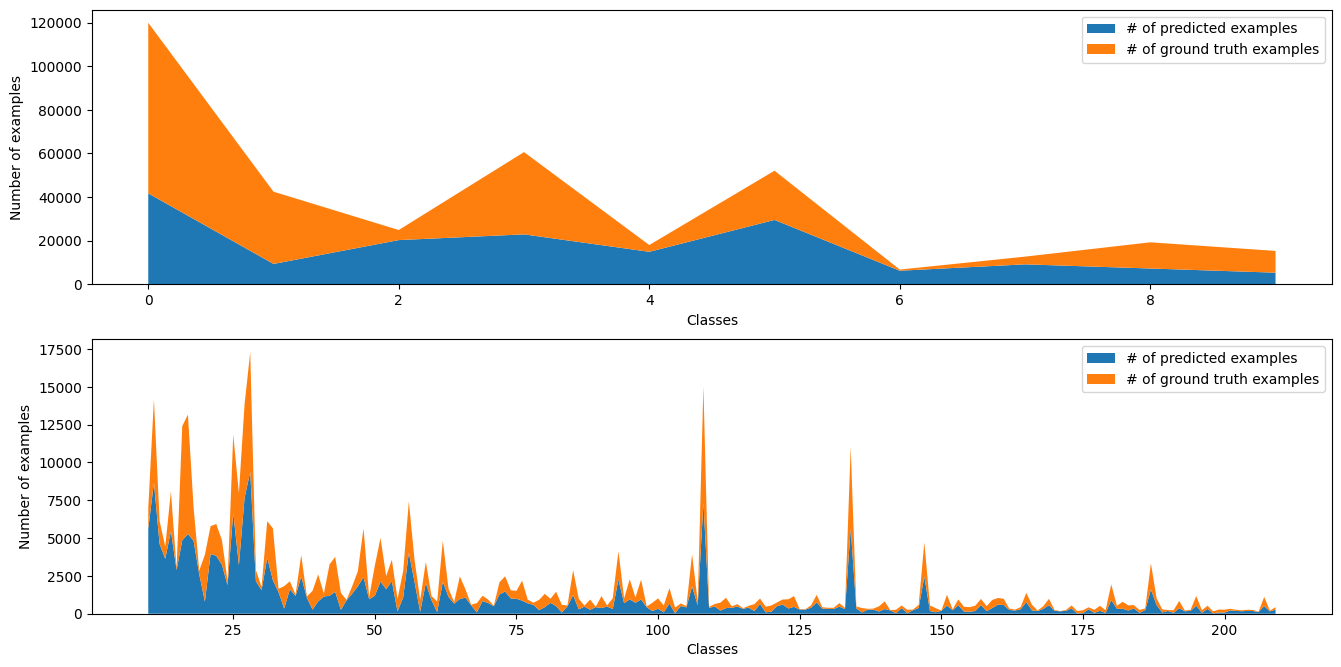

In [21]:
dfx = df.copy()
dfx = dfx.sort_values(by=["diff"], ascending=False)

def get_labels(i, n): return np.array(list(range(n))) + i
def get_preds(i, n): return take(dfx["pred"], start=i, end=i + n)
def get_gts(i, n): return take(dfx["gt"], start=i, end=i + n)
def get_values(i, n): return np.array([get_preds(i, n), get_gts(i, n)])

fig = plt.figure(figsize=(16, 8))

ax1, ax2 = fig.subplots(2, 1)

i, n = 0, 10
ax1.stackplot(get_labels(i, n), get_values(i, n),
             labels=["# of predicted examples", "# of ground truth examples"],)

ax1.legend()
# ax1.set_title("Frequency of classes sorted total number of prediction")
ax1.set_xlabel("Classes")
ax1.set_ylabel("Number of examples")

i, n = 10, 200
ax2.stackplot(get_labels(i, n), get_values(i, n),
             labels=["# of predicted examples", "# of ground truth examples"],)

ax2.legend()
# ax2.set_title("Frequency of classes sorted total number of prediction")
ax2.set_xlabel("Classes")
ax2.set_ylabel("Number of examples")

# i, n = 110, 400
# ax3.stackplot(get_labels(i, n), get_values(i, n),
#              labels=["# of predicted examples", "# of ground truth examples"],)

# ax3.legend()
# # ax3.set_title("Frequency of classes sorted total number of prediction")
# ax3.set_xlabel("Classes")
# ax3.set_ylabel("Number of examples")

plt.show()

## Like the above but with bars

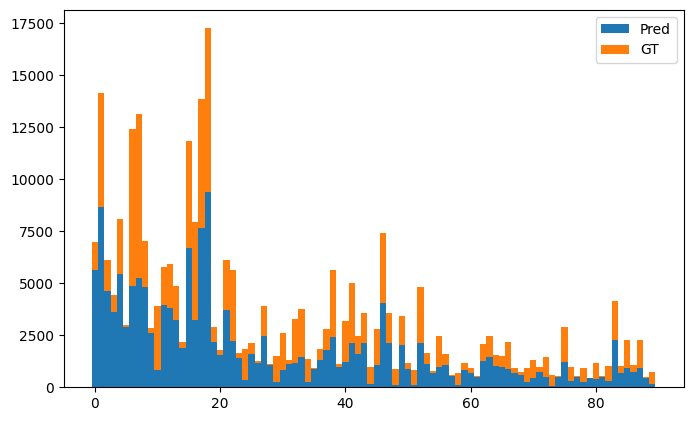

In [22]:
dfx = df.copy()

dfx = dfx.sort_values(by=["diff"], ascending=False)
dfx = take(dfx, start=10, end=100)

#labels = [""] * df["class"].shape[0]
labels = np.array(range(dfx["class"].shape[0]))
preds = dfx["pred"]
gts = dfx["gt"]

# vals = [preds, gts]

fig, ax = plt.subplots()
# ax.stackplot(labels, vals, labels=["Pred", "GT"])
ax.bar(labels, preds, label="Pred", width=1.0)
ax.bar(labels, gts, label="GT", width=1.0, bottom=preds)
ax.legend()

# stacked_plot(labels, preds, gts, title="Frequency of classes sorted total number of prediction")
plt.show()

## Difference between frequency of predicted and ground truth classes (i.e., absolute error)

## 

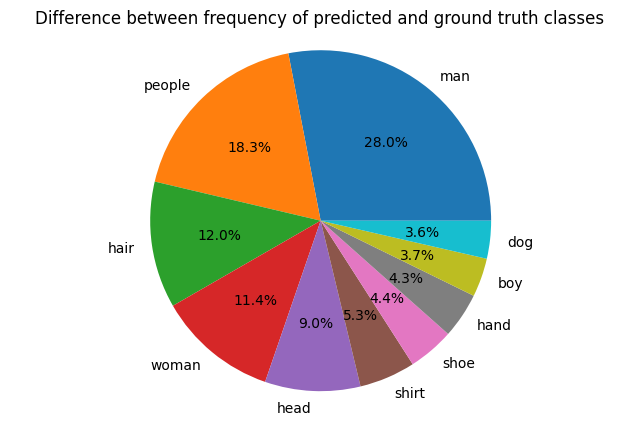

In [23]:
df = df.sort_values(by=["diff"], ascending=False)

labels = take10(df["class"])
diffs = take10(df["diff"])

pie_plot(labels, diffs, title="Difference between frequency of predicted and ground truth classes")
plt.show()

## Diff % wrt ground truth

In [24]:
dfx = df.copy()
dfx = dfx[(dfx["pred"] > 1000) & (dfx["gt"] > 1000)]

dfx.sort_values(by="diff_percent", ascending=False).head(n=10)

,class,pred,gt,diff,diff_percent,diff_rel,total
162,head,14896,3110,11786,0.654560,11786,18006
101,hair,20271,4628,15643,0.628258,15643,24899
374,window,5623,1345,4278,0.613949,4278,6968
443,people,9330,33149,23819,0.560724,-23819,42479
240,tree,4606,1521,3085,0.503509,3085,6127
308,hand,9143,3533,5610,0.442569,5610,12676
37,jeans,4818,2219,2599,0.369334,2599,7037
61,sky,3948,1838,2110,0.364673,2110,5786
83,pants,5455,2633,2822,0.348912,2822,8088
365,bag,3244,1629,1615,0.331418,1615,4873


## Esotheric classes

In [25]:
#(df["gt"] < 10) | 
df[(df["pred"] > 50) & (df["gt"] < 10)].sort_values(by="diff", ascending=False).head(n=20)

,class,pred,gt,diff,diff_percent,diff_rel,total
561,knob,77,1,76,0.974359,76,78
514,vent,77,6,71,0.855422,71,83
1062,letter,66,7,59,0.808219,59,73
219,faucet,59,3,56,0.903226,56,62
368,outlet,51,1,50,0.961538,50,52
1026,brick,52,3,49,0.890909,49,55


In [26]:
df[((df["gt"] >= 10) & (df["gt"] < 100)) | ((df["pred"] >= 10) & (df["pred"] < 100))].sort_values(by="diff", ascending=False).head(n=20)

,class,pred,gt,diff,diff_percent,diff_rel,total
146,tire,1173,90,1083,0.857482,1083,1263
275,watch,1060,78,982,0.862917,982,1138
385,eye,883,31,852,0.932166,852,914
824,sandal,558,43,515,0.856905,515,601
500,kids,92,605,513,0.736011,-513,697
474,sock,500,29,471,0.890359,471,529
633,players,76,514,438,0.742373,-438,590
543,belt,490,55,435,0.798165,435,545
233,tail,472,60,412,0.774436,412,532
623,cloud,436,25,411,0.891540,411,461


In [27]:
df[((df["gt"] >= 100) & (df["gt"] < 1000)) | ((df["pred"] >= 100) & (df["pred"] < 1000))].sort_values(by="diff", ascending=False).head(n=20)

,class,pred,gt,diff,diff_percent,diff_rel,total
205,shoe,6214,533,5681,0.842004,5681,6747
269,face,3634,802,2832,0.638413,2832,4436
227,ear,2889,110,2779,0.926642,2779,2999
241,wheel,2604,249,2355,0.825447,2355,2853
549,men,807,3098,2291,0.586684,-2291,3905
550,shadow,1887,276,1611,0.744799,1611,2163
487,pole,2154,729,1425,0.494277,1425,2883
322,nose,1557,211,1346,0.761312,1346,1768
608,light,1421,226,1195,0.725562,1195,1647
600,women,343,1480,1137,0.623697,-1137,1823


In [28]:
df[(df["gt"] >= 1000) | (df["pred"] >= 1000)].sort_values(by="diff", ascending=False).head(n=20)

,class,pred,gt,diff,diff_percent,diff_rel,total
40,man,41710,78250,36540,0.304602,-36540,119960
443,people,9330,33149,23819,0.560724,-23819,42479
101,hair,20271,4628,15643,0.628258,15643,24899
75,woman,22893,37751,14858,0.245004,-14858,60644
162,head,14896,3110,11786,0.654560,11786,18006
41,shirt,29515,22585,6930,0.133013,6930,52100
205,shoe,6214,533,5681,0.842004,5681,6747
308,hand,9143,3533,5610,0.442569,5610,12676
190,boy,7232,12019,4787,0.248662,-4787,19251
99,dog,5316,9989,4673,0.305325,-4673,15305


## Pred vs GT

We have 12 outliers in x and 5 outliers in y
Disregarded 12 outliers


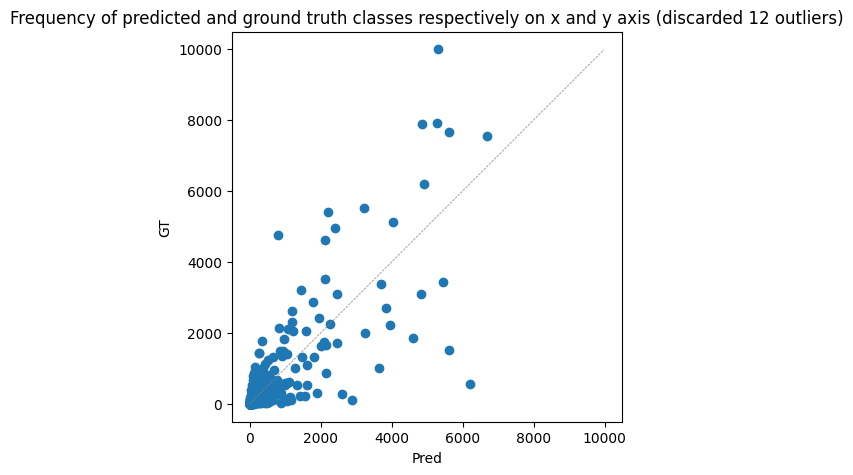

In [29]:
def scatter_plot(x, y):
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65

    rect_scatter = [left, bottom, width, height]

    # start with a square Figure
    fig = plt.figure(figsize=(6, 6))

    # scatter plot
    ax = fig.add_axes(rect_scatter)
    ax.scatter(x, y)

    # labels
    ax.set_xlabel("Pred")
    ax.set_ylabel("GT")


def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]


dfx = df.copy()
dfx = dfx.sort_values(by="gt", ascending=False)

m = 3.3

x = dfx["pred"].to_numpy()
y = dfx["gt"].to_numpy()

s1 = x.shape[0]

x = reject_outliers(x, m=m)
y = reject_outliers(y, m=m)

sx = x.shape[0]
sy = y.shape[0]
s2 = min(sx, sy)

# clip to same size
x = x[:s2]
y = y[:s2]
good = list(range(max(np.max(np.abs(x)), np.max(np.abs(y)))))

n_outliers = s1 - s2

print(f"We have {s1 - sx} outliers in x and {s1 - sy} outliers in y")
print(f"Disregarded {n_outliers} outliers")


scatter_plot(x, y)
plt.plot(good, good, color="gray", linewidth=0.5, linestyle="--")
plt.title(f"Frequency of predicted and ground truth classes respectively on x and y axis (discarded {n_outliers} outliers)")
plt.show()

We have 79 outliers in x and 60 outliers in y
Disregarded 79 outliers


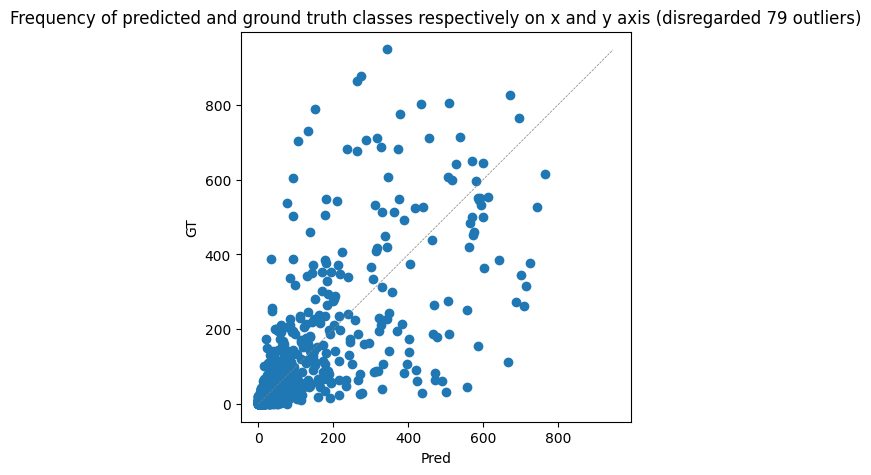

In [30]:
dfx = df.copy()
dfx = dfx.sort_values(by="gt", ascending=False)

m = 0.2

x = dfx["pred"].to_numpy()
y = dfx["gt"].to_numpy()

s1 = x.shape[0]  # size of arrays before outliers are removed

x = reject_outliers(x, m=m)
y = reject_outliers(y, m=m)

sx = x.shape[0]
sy = y.shape[0]
s2 = min(sx, sy)

# clip to same size
x = x[:s2]
y = y[:s2]
good = list(range(max(np.max(np.abs(x)), np.max(np.abs(y)))))

n_outliers = s1 - s2

print(f"We have {s1 - sx} outliers in x and {s1 - sy} outliers in y")
print(f"Disregarded {n_outliers} outliers")

scatter_plot(x, y)
plt.plot(good, good, color="gray", linewidth=0.5, linestyle="--")
plt.title(f"Frequency of predicted and ground truth classes respectively on x and y axis (disregarded {n_outliers} outliers)")
plt.show()

## How many out-of-vocabulary classes do we have in ground truth?

In [42]:
out_of_vocabulary = ['alarm clock', 'ceiling fan', 'tail fin', 'birthday cake', 'stop sign,stopsign', 'microwave,microwave oven', 'skateboard ramp', 'refrigerator,fridge', 'knee pads', 'tennis court', 'tea pot', 'television,tv', 'garage door', 'sailboat,sail boat', 'racket,racquet', 'rock wall', 'headboard,head board', 'tea kettle', 'tennis racket,tennis racquet', 'train station', 'tennis player', 'toilet brush', 'pepper shaker', 'hair dryer', 'toilet seat', 'skateboard,skate board', 'floor lamp', 'french fries', 'christmas tree', 'living room', 'teddy bear', 'baseball field', 'ski boot', 'shower curtain', 'polar bear', 'hot dog,hotdog', 'surfboard,surf board', 'dirt bike', 'tail wing', 'area rug', 'bow tie', 'fire extinguisher', 'tail feathers', 'beach chair', 'fire hydrant,hydrant', 'weather vane', 'soccer ball', 'head band', 'bath tub', 'coffee table', 'traffic light', 'parking meter', 'wet suit', 'teddy bears', 'suitcase,suit case', 'tank top', 'shin guard', 'wii remote', 'pizza slice', 'home plate', 'ski boots', 'snow suit', 'banana slice', 'stuffed animals', 'train platform', 'tissue box', 'cutting board', 'license plate', 'ski pole', 'clock tower', 'toilet tank', 'palm trees', 'skate park', 'computer monitor', 'flip flop', 'remote control', 'paper towels', 'train tracks', 'donut,doughnut', 'soccer player', 'toilet bowl', 'lounge chair', 'sidewalk,side walk', 'stove top,stovetop', 'tomato slice', 'window sill', 'toilet lid', "pitcher's mound", 'palm tree', 'banana bunch', 'tennis shoe', 'giraffe head', 'baseball player', 'water bottle', 'tennis ball', 'cell phone', 'computer mouse', 'ski pants', 'clock face', 'fire escape', 'police officer', 'trash can', 'front window', 'office chair', 'door knob', 'banana peel', 'baseball game', 'cabinet door', 'traffic cone', 'nightstand,night stand', 'suit jacket', 'train engine', 'wrist band', 'toilet paper', 'street sign', 'computer screen', 'wine glass', 'train car', 'donuts,doughnuts', 'tennis match', 'railroad tracks', 'stuffed bear', 'snow pants', 'neck tie', 'baseball bat', 'safety cone', 'paper towel', 'back wheel', 'soccer field', 'throw pillow', 'oven door', 'lamp shade', 'pine tree', 'lamp post,lamppost', 'station wagon', 'signal light', 'american flag', 'baseball cap', 'front legs', 'life jacket', 'water tank', 'gas station', 'entertainment center', 'stuffed animal', 'display case', 'front wheel', 'coffee pot', 'cowboy hat', 'table cloth', 'fire truck,firetruck', 'game controller', 'sweat band', 'coin slot', 'pillow case', 'coffee cup', 'counter top', 'baseball uniform', 'book shelf', 'facial hair', 'end table', 'shin guards', 'head light', 'tennis net', 'trash bag', 'ski poles', 'parking lot', 'gas tank', 'soap dispenser', 'life vest', 'train front', 'exhaust pipe', 'light fixture', 'power lines', 'roman numerals', 'picnic table', 'wine bottle', 'tree trunk', 'motor bike', 'traffic sign', 'little girl', 'passenger car', 'brake light', 'roman numeral', 'shower head', 'handle bars', 'cardboard box', 'mountain range', 'eye glasses', 'salt shaker', 'knee pad', 'shower door', 'bathing suit', 'manhole cover', 'door handle', 'picture frame', 'hour hand', 'dvd player', 'ski slope', 'french fry', 'landing gear', 'coffee maker', 'light switch', 'tv stand', 'air vent', 'steering wheel', 'baseball glove', 'power pole', 'dirt road', 'telephone pole', 'jet engine', 'tee shirt', 'face mask', 'bathroom sink', 'laptop computer', 'windshield wipers', 'hill side', 'tail light,taillight', 'snow board', 'stop light', 'ball cap', 'traffic signal', 'soda can', 'ski lift', 'tennis shoes', 'swim trunks', 'butter knife', 'train cars', 'pine trees', 'park bench', 'second floor', 'hand towel', 'flip flops', 'back pack', 'ski tracks', 'baseball players', 'stone wall', 'dress shirt', 'ski goggles', 'power line', 'train track', 'air conditioner', 'baseball mitt', 'mouse pad', 'garbage can', 'taxi cab', 'control panel', 'clock hand', 'brick wall', 'grass field', 'utility pole', 'mountain top', 'hot dogs,hotdogs', 'bed frame', 'tail lights', 'traffic lights', 'candle holder', 'guard rail', 'tree branches', 'trash bin', 'side mirror', 'light pole', 'street lamp', 'paper plate', 'fence post', 'door frame', 'tshirt,t-shirt,t shirt', 'wire fence', 'side window', 'table lamp', 'pony tail', 'ocean water', 'flower pot', 'tree line', 'sign post', 'ski suit', 'passenger train', "catcher's mitt", 'electrical outlet', 'bike rack', 'windshield wiper', 'bus stop', 'police car', 'name tag', 'computer keyboard', 'glass door', 'wine glasses', 'young man', 'light post', 'ski jacket', 'streetlight,street light', 'beer bottle', 'wrist watch', 'tile floor', 'tree branch', 'towel rack']
assert len(out_of_vocabulary) == 295

# please note that loaded classes were preprocessed in order to replace commas with slashes for better usage with CSV extension.
# we need to preprocess also this classes

# print(len(list(filter(lambda x: x.find(',') != -1, out_of_vocabulary))))

out_of_vocabulary = [oov.replace(",", "/") for oov in out_of_vocabulary]

24


In [40]:
dfx = df.copy()

dfx = dfx[dfx["class"].isin(out_of_vocabulary)]
dfx = dfx.sort_values(by=['diff'], ascending=False)

n_gt_oov = dfx["gt"].sum()
n_pred_oov = dfx["pred"].sum()
n_diff_oov = dfx["diff"].sum()
n = df["gt"].sum()

assert n == df["pred"].sum()

print(f"In totale, ci sono {n_gt_oov} bounding box ground truth etichettate con classi out-of-vocabulary")
print(f"In totale, il modello predice {n_pred_oov} bounding box etichettate con classi out-of-vocabulary")
print(f"In totale, la differenza del valore assoluto tra la frequenza delle classi predette e quella delle ground truth è {n_diff_oov} su un totale di {n} query")
print(dfx.head())

In totale, ci sono 8315 bounding box ground truth etichettate con classi out-of-vocabulary
In totale, il modello predice 8445 bounding box etichettate con classi out-of-vocabulary
In totale, la differenza del valore assoluto tra la frequenza delle classi predette e quella delle ground truth è 2948 su un totale di 427226 query
                      class  pred    gt  diff  diff_percent  diff_rel  total
328      sidewalk/side walk  4039  3383   656      0.088386       656   7422
113    surfboard/surf board   509   948   439      0.301304      -439   1457
431               trash can   271    68   203      0.598820       203    339
49           racket/racquet   169   334   165      0.328032      -165    503
72   skateboard/skate board   902  1034   132      0.068182      -132   1936
